### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loadind data

In [2]:
df=pd.read_csv("ilpd.csv")
df


,Age,gender,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_protiens,albumin,albumine_and_globulin_ratio,disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


### Understanding the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          583 non-null    int64  
 1   gender                       583 non-null    object 
 2   total_bilirubin              583 non-null    float64
 3   direct_bilirubin             583 non-null    float64
 4   alkaline_phosphotase         583 non-null    int64  
 5   alamine_aminotransferase     583 non-null    int64  
 6   aspartate_aminotransferase   583 non-null    int64  
 7   total_protiens               583 non-null    float64
 8   albumin                      583 non-null    float64
 9   albumine_and_globulin_ratio  579 non-null    float64
 10  disease                      583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [4]:
print(df.isnull().sum())

Age                            0
gender                         0
total_bilirubin                0
direct_bilirubin               0
alkaline_phosphotase           0
alamine_aminotransferase       0
aspartate_aminotransferase     0
total_protiens                 0
albumin                        0
albumine_and_globulin_ratio    4
disease                        0
dtype: int64


In [5]:
df.describe()

,Age,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_protiens,albumin,albumine_and_globulin_ratio,disease
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


### Preprocessing 
##### Encoding
- Female -> 0, Male -> 1

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])


C:\Users\dhanyadha\AppData\Local\Temp\ipykernel_1940\842646343.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', palette='Set2')


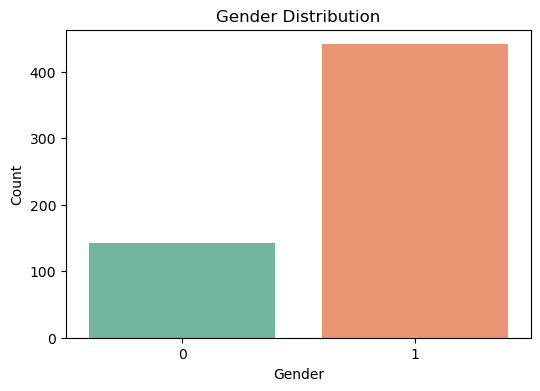

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='gender', palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

##### Heat map
- to find the relationship between two feature

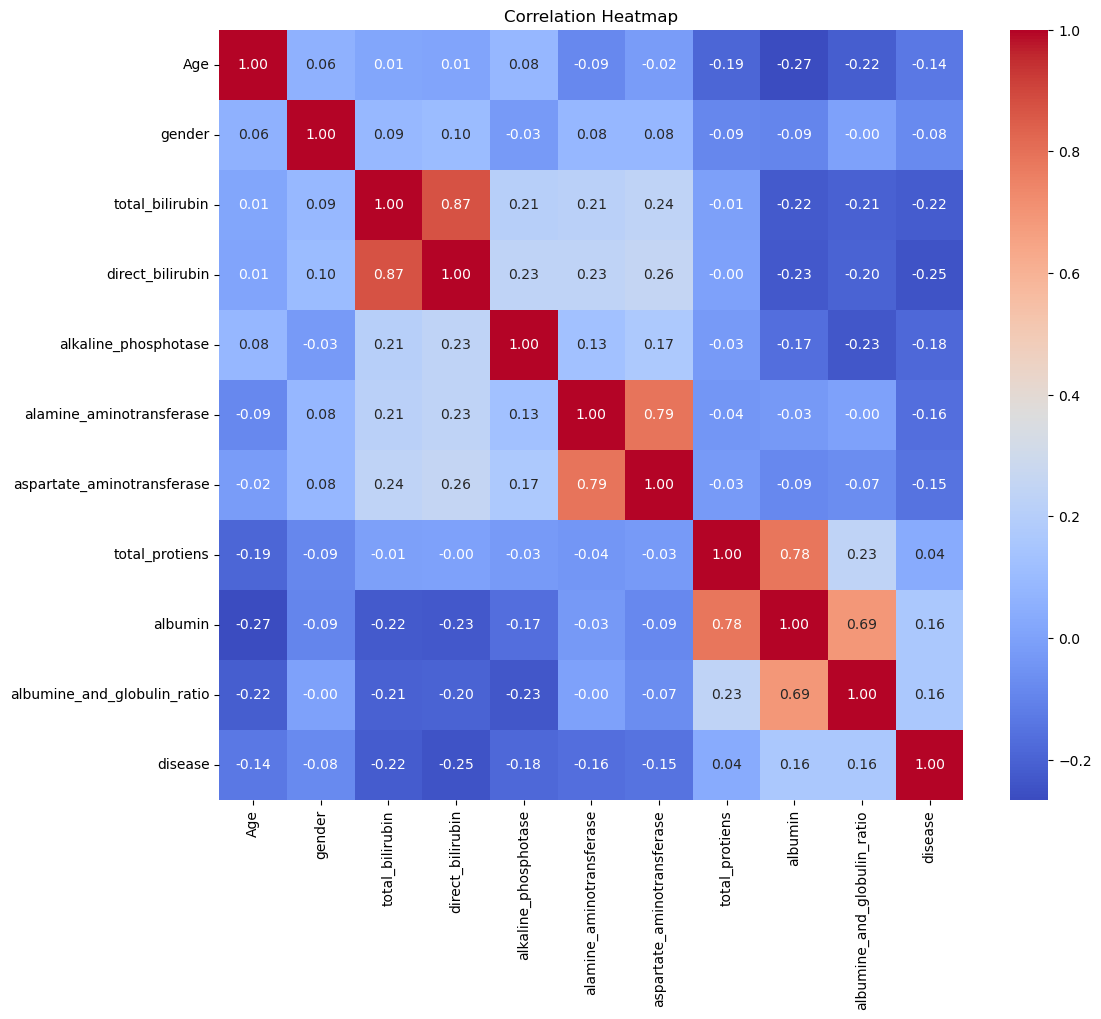

In [8]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

##### Paip plot

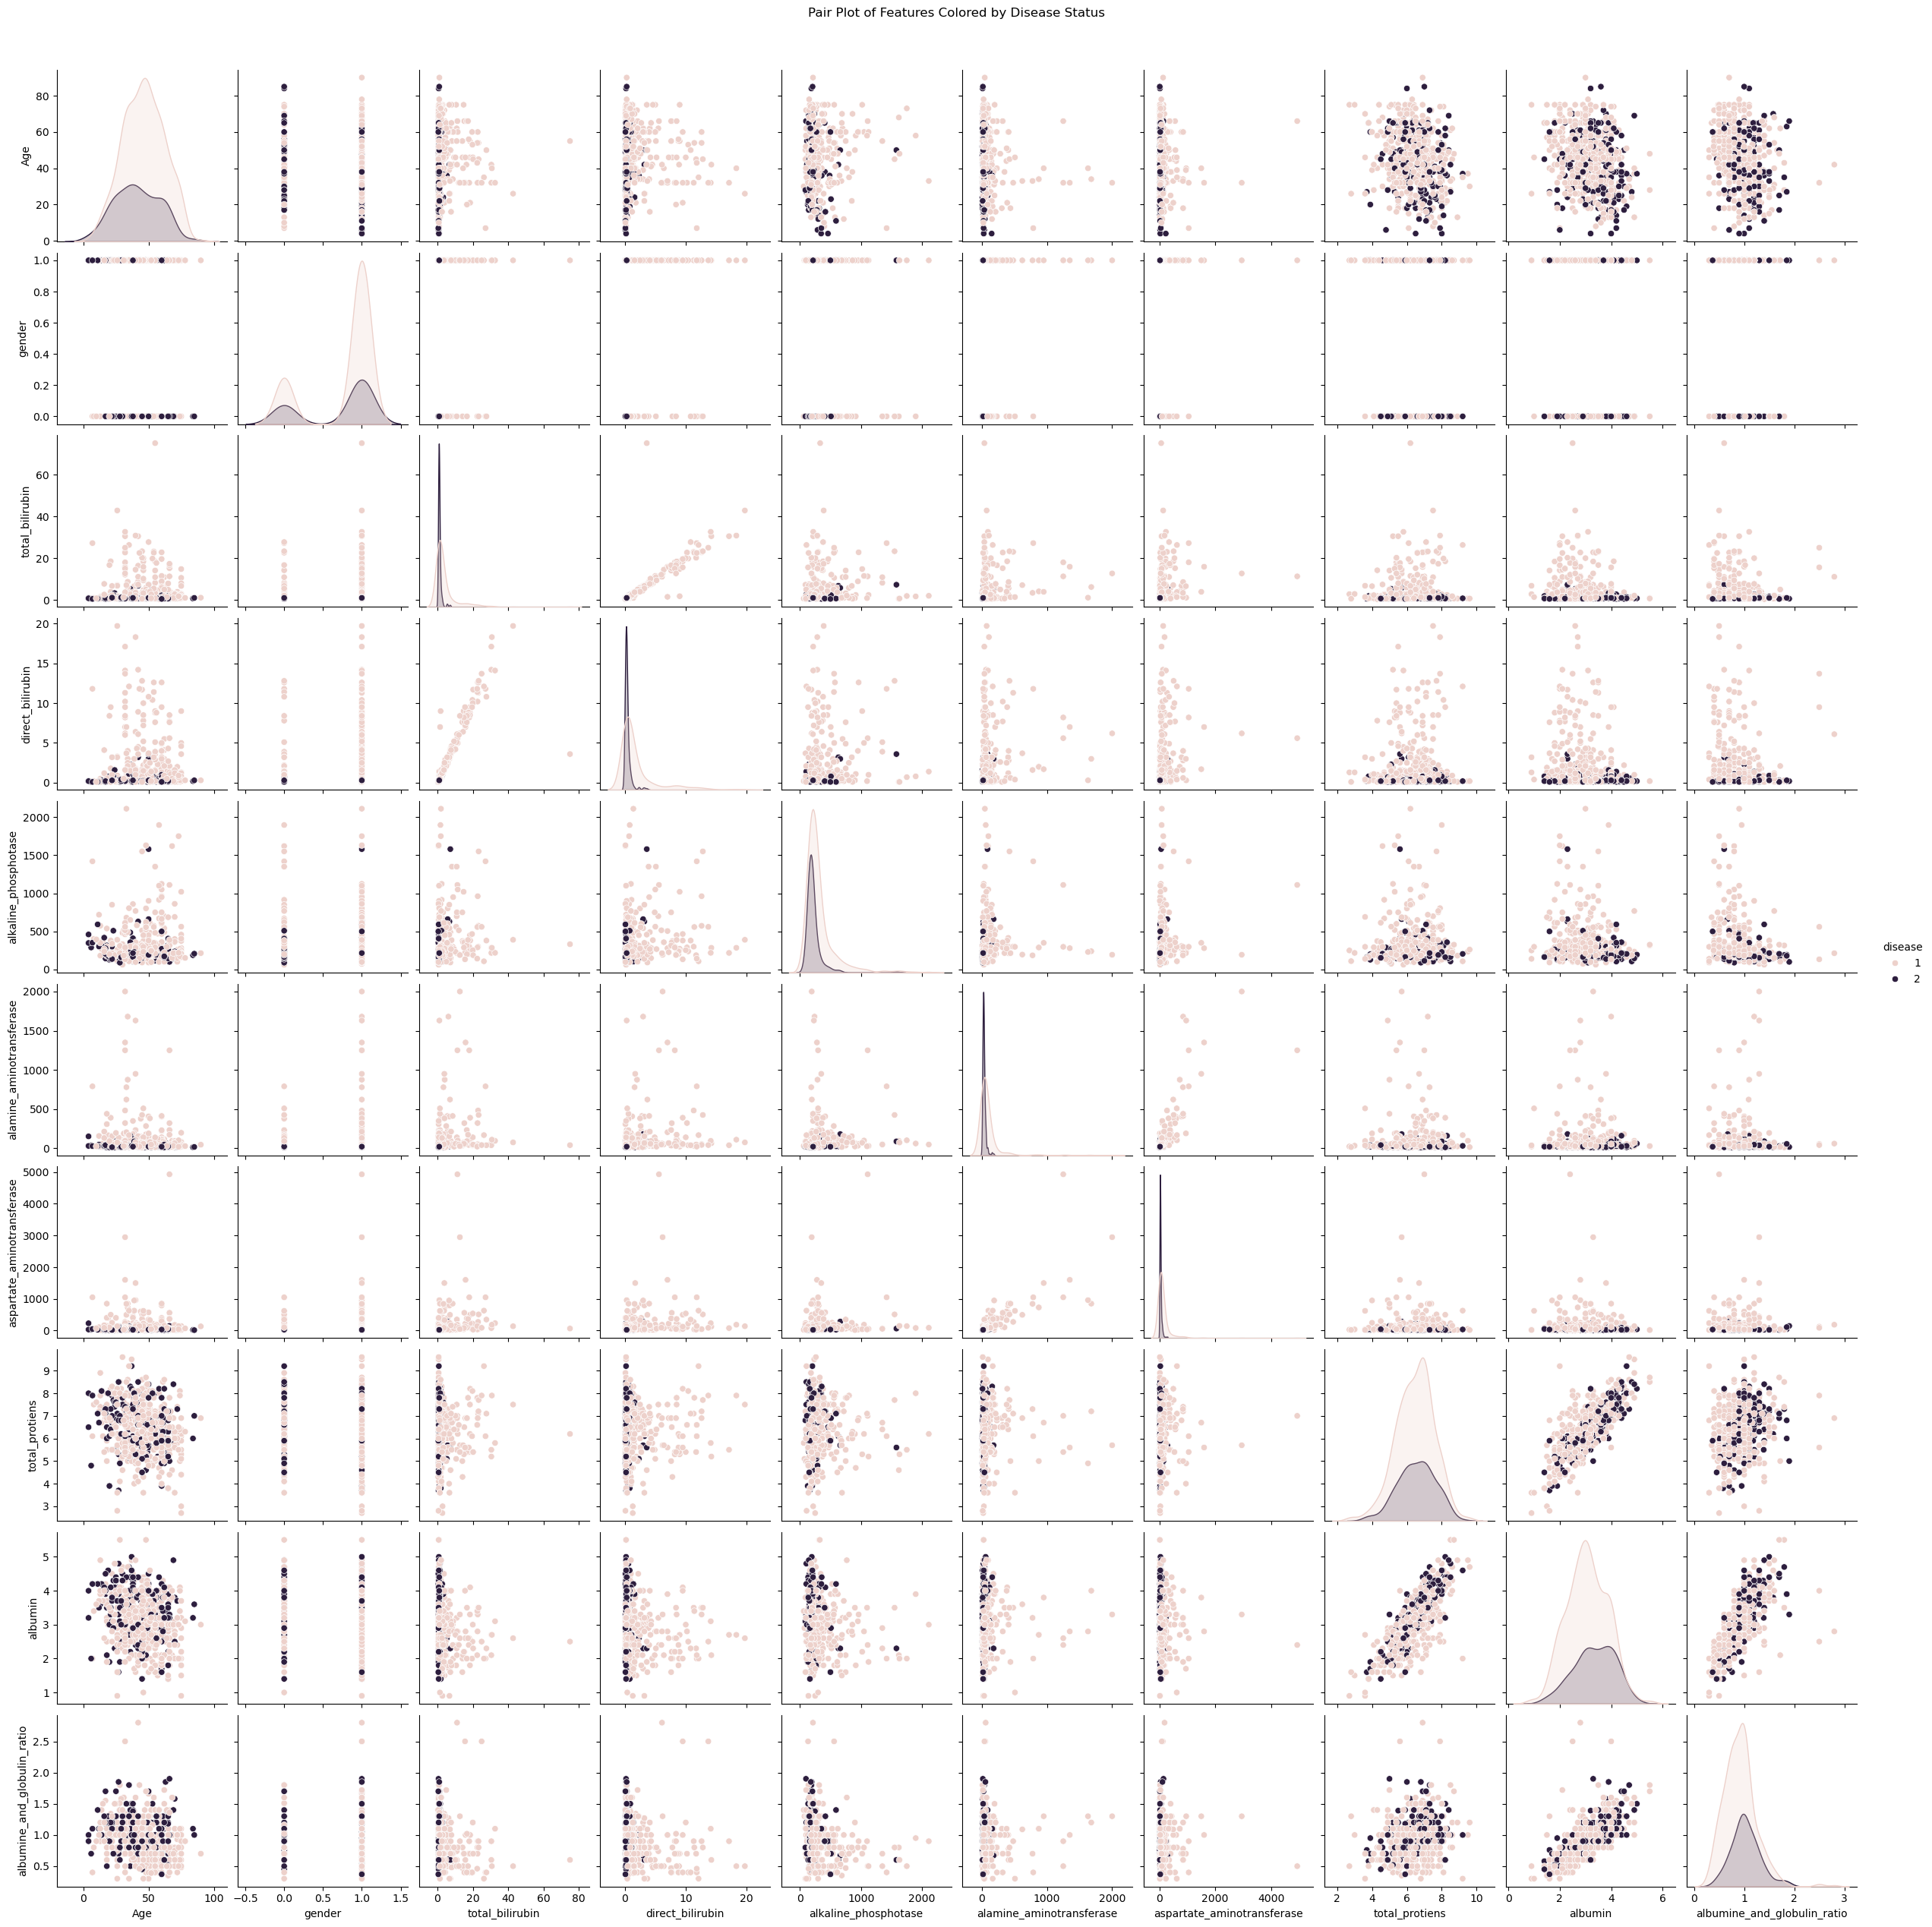

In [9]:
sns.pairplot(df, hue='disease', diag_kind='kde')
plt.suptitle('Pair Plot of Features Colored by Disease Status', y=1.02)
plt.show()

##### Filling the null value

In [10]:
df.fillna(df.median(), inplace=True)

In [11]:
df.isnull().sum()

Age                            0
gender                         0
total_bilirubin                0
direct_bilirubin               0
alkaline_phosphotase           0
alamine_aminotransferase       0
aspartate_aminotransferase     0
total_protiens                 0
albumin                        0
albumine_and_globulin_ratio    0
disease                        0
dtype: int64

##### Encoding
- 1 -> 1(liver patient),2 -> 0(not liver patient)

In [12]:
df['disease'] = df['disease'].map({1: 1, 2: 0})

###  Splitting Data into Train & Test Sets

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df.drop('disease', axis=1)
y = df['disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Feature Scaling

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Building
- Training Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = lr_model.predict(X_test_scaled)

### Evaluating the model

In [17]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.18      0.28        34
           1       0.74      0.96      0.84        83

    accuracy                           0.74       117
   macro avg       0.70      0.57      0.56       117
weighted avg       0.72      0.74      0.68       117



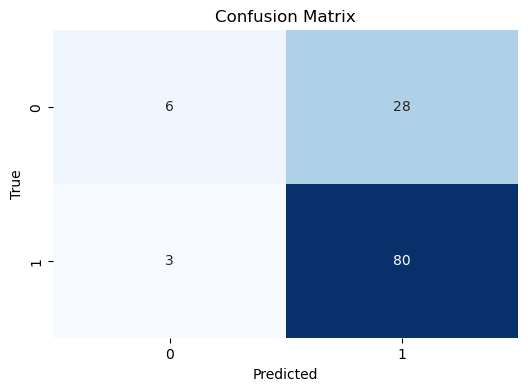

In [18]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## feature engineering

In [19]:
num_col = df.select_dtypes(include=['int64', 'int32', 'float64']).columns
num_col

Index(['Age', 'gender', 'total_bilirubin', 'direct_bilirubin',
       'alkaline_phosphotase', 'alamine_aminotransferase',
       'aspartate_aminotransferase', 'total_protiens', 'albumin',
       'albumine_and_globulin_ratio', 'disease'],
      dtype='object')

In [20]:
num_col=num_col.drop(['gender','disease'])
num_col

Index(['Age', 'total_bilirubin', 'direct_bilirubin', 'alkaline_phosphotase',
       'alamine_aminotransferase', 'aspartate_aminotransferase',
       'total_protiens', 'albumin', 'albumine_and_globulin_ratio'],
      dtype='object')

- Calculating skewness 

In [21]:
from scipy.stats import skew
skewness_values = df[num_col].apply(skew)
skewed_features = skewness_values[abs(skewness_values) > 1]
print("Highly Skewed Features:\n", skewed_features)

Highly Skewed Features:
 total_bilirubin                4.894839
direct_bilirubin               3.204132
alkaline_phosphotase           3.755412
alamine_aminotransferase       6.532329
aspartate_aminotransferase    10.519024
dtype: float64


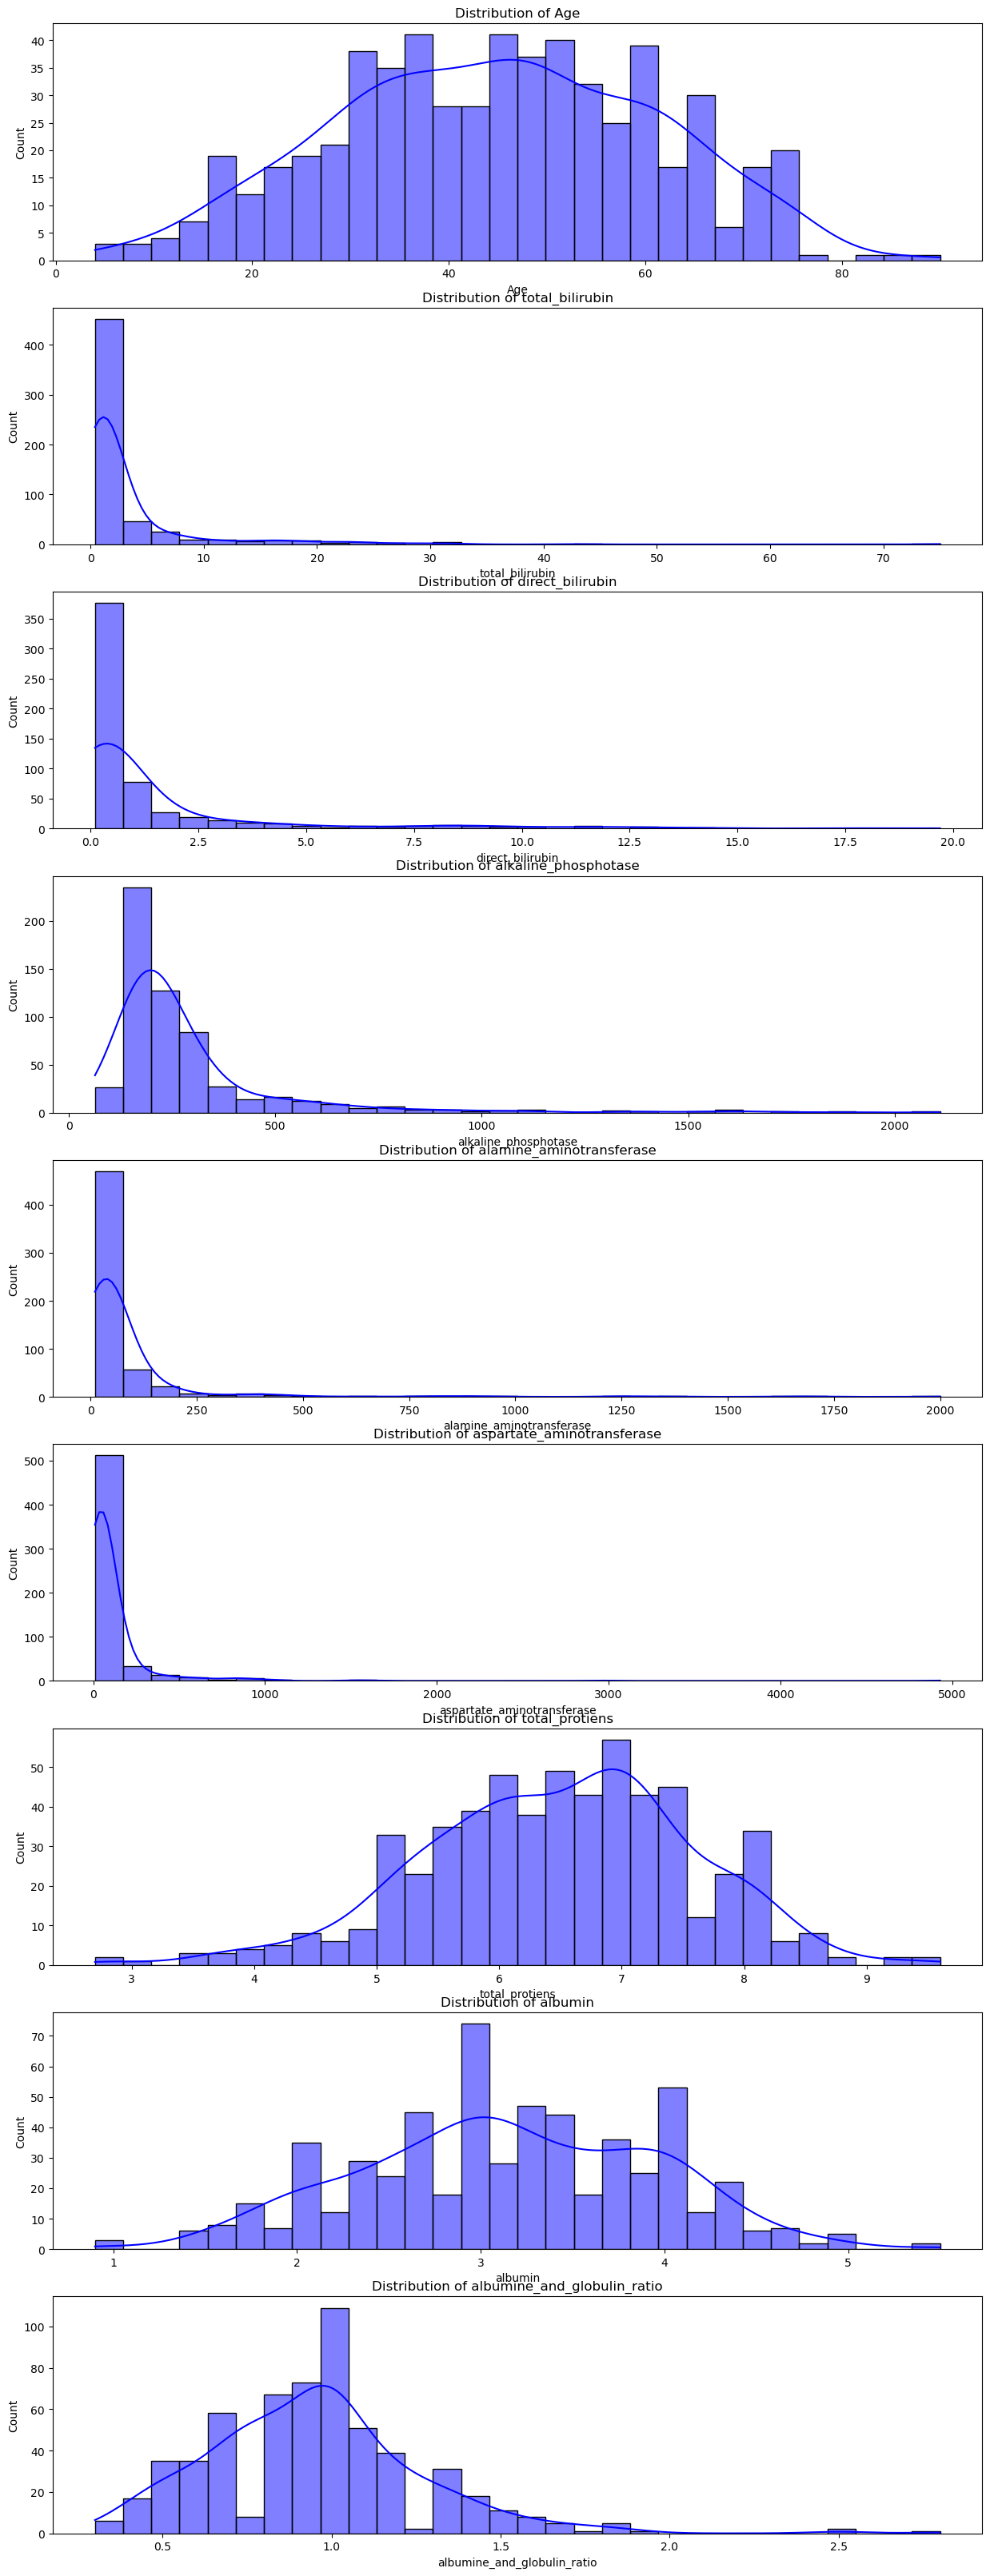

In [22]:
plt.figure(figsize=(15, 50))
for i, feature in enumerate(num_col):
    plt.subplot(11,1, i + 1) 
    sns.histplot(df[feature], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {feature}")
plt.show()

###  Log Transformation

In [23]:
import numpy as np

df['total_bilirubin'] = np.log1p(df['total_bilirubin'])  
df['alkaline_phosphotase'] = np.log1p(df['alkaline_phosphotase'])  
df['alamine_aminotransferase'] = np.log1p(df['alamine_aminotransferase'])  
df['aspartate_aminotransferase'] = np.log1p(df['aspartate_aminotransferase'])  


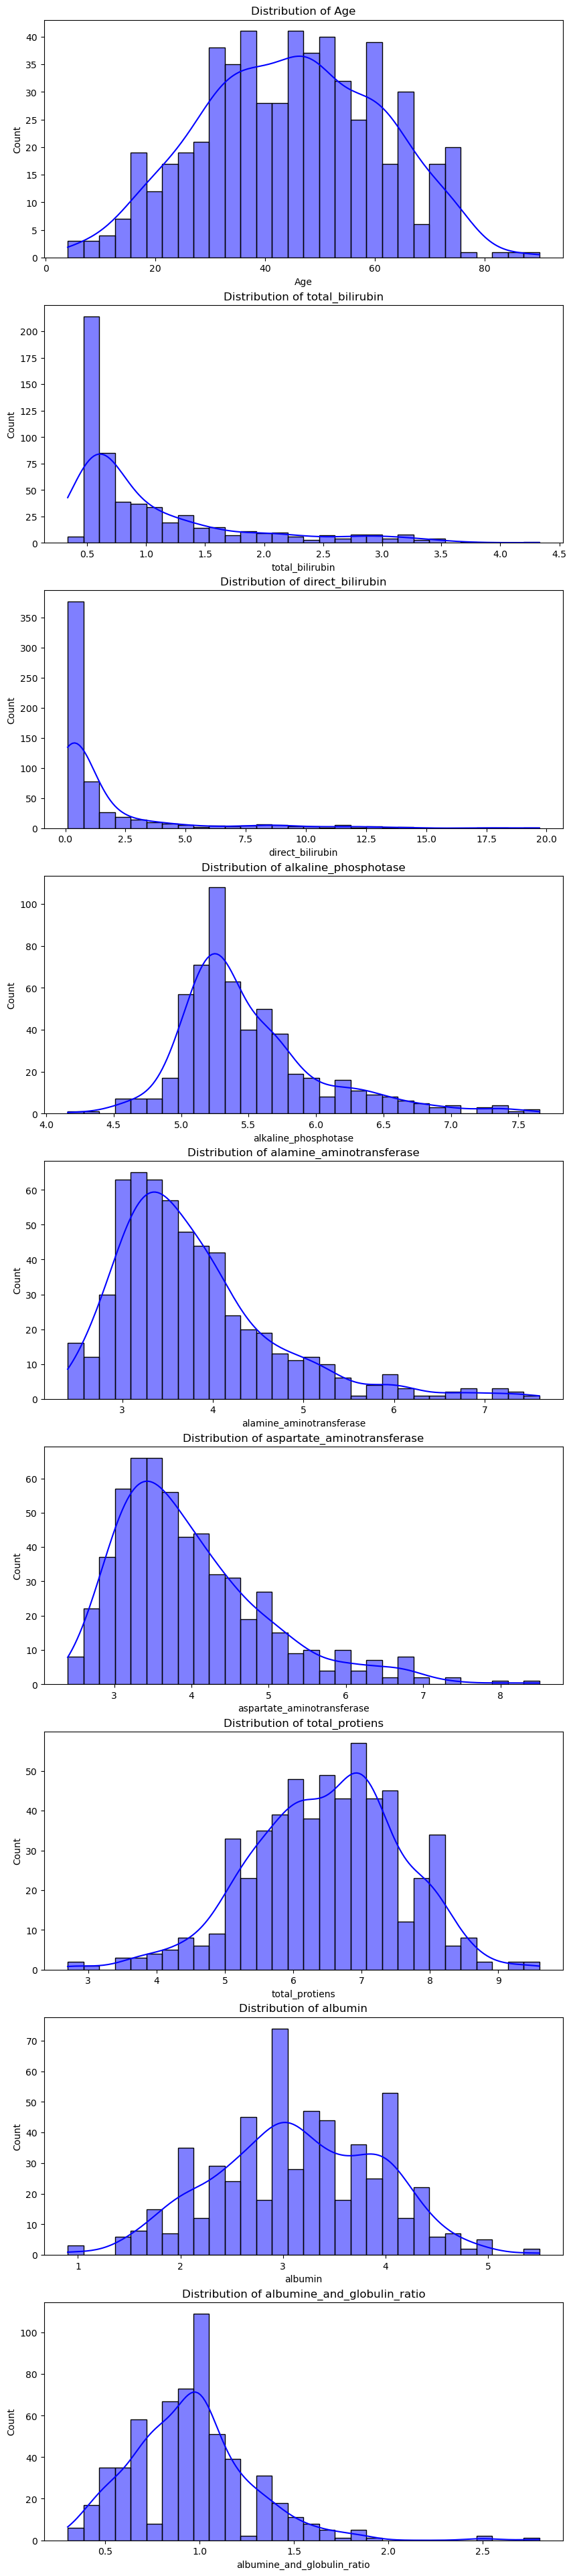

In [24]:
plt.figure(figsize=(10, 60))
for i, feature in enumerate(num_col):
    plt.subplot(11,1, i + 1) 
    sns.histplot(df[feature], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {feature}")
plt.show()


### Balancing the data

In [25]:
print(df['gender'].value_counts()) 
print(df['disease'].value_counts()) 


gender
1    441
0    142
Name: count, dtype: int64
disease
1    416
0    167
Name: count, dtype: int64


- balancing the gender
- store the balanced data in a ne dataframe (df_balanced_gender)

In [26]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df.drop(columns=['gender']), df['gender'])
df_balanced_gender = pd.concat([X_resampled, y_resampled], axis=1)
print(df_balanced_gender['gender'].value_counts())

gender
0    441
1    441
Name: count, dtype: int64


- balancing the disease 
- stored the data in the new dataframe df_final

In [27]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(df_balanced_gender.drop(columns=['disease']), df_balanced_gender['disease'])
df_final = pd.concat([X_resampled, y_resampled], axis=1)
print(df_final['disease'].value_counts())
df_final.to_csv("balanced_dataset.csv", index=False)

disease
1    610
0    610
Name: count, dtype: int64


### loading the df_final as bdf

In [28]:
bdf=pd.read_csv('balanced_dataset.csv')
bdf.head()

,Age,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_protiens,albumin,albumine_and_globulin_ratio,gender,disease
0,65,0.530628,0.1,5.236442,2.833213,2.944439,6.8,3.3,0.90,0,1
1,62,2.476538,5.5,6.551080,4.174387,4.615121,7.5,3.2,0.74,1,1
2,62,2.116256,4.1,6.196444,4.110874,4.234107,7.0,3.3,0.89,1,1
3,58,0.693147,0.4,5.209486,2.708050,3.044522,6.8,3.4,1.00,1,1
4,72,1.589235,2.0,5.278115,3.332205,4.094345,7.3,2.4,0.40,1,1


### spliting data

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = bdf.drop('disease', axis=1)
y = bdf['disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### feature scaling

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model building
- training logistic regression

In [31]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=62)
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=62)

- Evaluate the model

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {lr_accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("confusion matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.67
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.80      0.71       122
           1       0.73      0.54      0.62       122

    accuracy                           0.67       244
   macro avg       0.68      0.67      0.67       244
weighted avg       0.68      0.67      0.67       244

confusion matrix:
[[98 24]
 [56 66]]


- training random forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
rr_model = RandomForestClassifier(n_estimators=100,random_state=42)
rr_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

- evaluting the model

In [34]:
y_pred = rr_model.predict(X_test_scaled)
rr_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {rr_accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("confusion matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       122
           1       0.88      0.89      0.89       122

    accuracy                           0.89       244
   macro avg       0.89      0.89      0.89       244
weighted avg       0.89      0.89      0.89       244

confusion matrix:
[[107  15]
 [ 13 109]]


- training Gradient boosting

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
xg_model = GradientBoostingClassifier(random_state=42)
xg_model.fit(X_train_scaled, y_train)

GradientBoostingClassifier(random_state=42)

- Evaluate the model

In [36]:
y_pred = xg_model.predict(X_test_scaled)
xg_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {xg_accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("confusion matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       122
           1       0.85      0.86      0.85       122

    accuracy                           0.85       244
   macro avg       0.85      0.85      0.85       244
weighted avg       0.85      0.85      0.85       244

confusion matrix:
[[103  19]
 [ 17 105]]


### Best model
- random forest

In [38]:
print(f"Logistic Regreesion : {lr_accuracy:.2f}")
print(f"Random forest : {rr_accuracy:.2f}")
print(f"Gradient boosting : {xg_accuracy:.2f}")

Logistic Regreesion : 0.67
Random forest : 0.89
Gradient boosting : 0.85
